In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
from pathlib import Path
from sklearn.impute import SimpleImputer
sns.set()
%matplotlib inline
pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()

In [3]:
covid = pd.read_csv('../Data/covid_19_data.csv')

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              285307 non-null  int64  
 1   ObservationDate  285307 non-null  object 
 2   Province/State   212318 non-null  object 
 3   Country/Region   285307 non-null  object 
 4   Last Update      285307 non-null  object 
 5   Confirmed        285307 non-null  float64
 6   Deaths           285307 non-null  float64
 7   Recovered        285307 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.4+ MB


In [6]:
empty_columns = covid.isnull().sum()
empty_columns[empty_columns>0]

Province/State    72989
dtype: int64

In [7]:
imputer = SimpleImputer(strategy='constant')
impute_covid = pd.DataFrame(imputer.fit_transform(covid), columns=covid.columns)
impute_covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531,1919,78700
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045,233,0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344,1,1322
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641,1597,68529


## Process data to right type

In [8]:
impute_covid['ObservationDate'] = pd.to_datetime(impute_covid['ObservationDate'])
impute_covid['Last Update'] = pd.to_datetime(impute_covid['Last Update'])
impute_covid['Confirmed'] = pd.to_numeric(impute_covid['Confirmed'], errors='coerce')
impute_covid['Recovered'] = pd.to_numeric(impute_covid['Recovered'], errors='coerce')
impute_covid['Deaths'] = pd.to_numeric(impute_covid['Deaths'], errors='coerce')

In [9]:
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              285307 non-null  object        
 1   ObservationDate  285307 non-null  datetime64[ns]
 2   Province/State   285307 non-null  object        
 3   Country/Region   285307 non-null  object        
 4   Last Update      285307 non-null  datetime64[ns]
 5   Confirmed        285307 non-null  float64       
 6   Deaths           285307 non-null  float64       
 7   Recovered        285307 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 17.4+ MB


In [10]:
impute_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


### Calculate active confirmed case

In [11]:
impute_covid['active_confirmed'] = impute_covid['Confirmed'].values - (impute_covid['Deaths'].values + impute_covid['Recovered'].values)

In [12]:
impute_covid.isnull().sum()[impute_covid.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SNo               285307 non-null  object        
 1   ObservationDate   285307 non-null  datetime64[ns]
 2   Province/State    285307 non-null  object        
 3   Country/Region    285307 non-null  object        
 4   Last Update       285307 non-null  datetime64[ns]
 5   Confirmed         285307 non-null  float64       
 6   Deaths            285307 non-null  float64       
 7   Recovered         285307 non-null  float64       
 8   active_confirmed  285307 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 19.6+ MB


In [14]:
impute_covid.corr()

,Confirmed,Deaths,Recovered,active_confirmed
Confirmed,1.000000,0.885990,0.591882,0.685338
Deaths,0.885990,1.000000,0.509682,0.614090
Recovered,0.591882,0.509682,1.000000,-0.181222
active_confirmed,0.685338,0.614090,-0.181222,1.000000


In [15]:
features = [['Confirmed', 'Deaths'], ['Confirmed', 'Recovered'], ['Recovered', 'Deaths'], \
            ['Confirmed', 'active_confirmed']]
values = [[impute_covid['Confirmed'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['Recovered']],\
          [impute_covid['Recovered'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['active_confirmed']]]

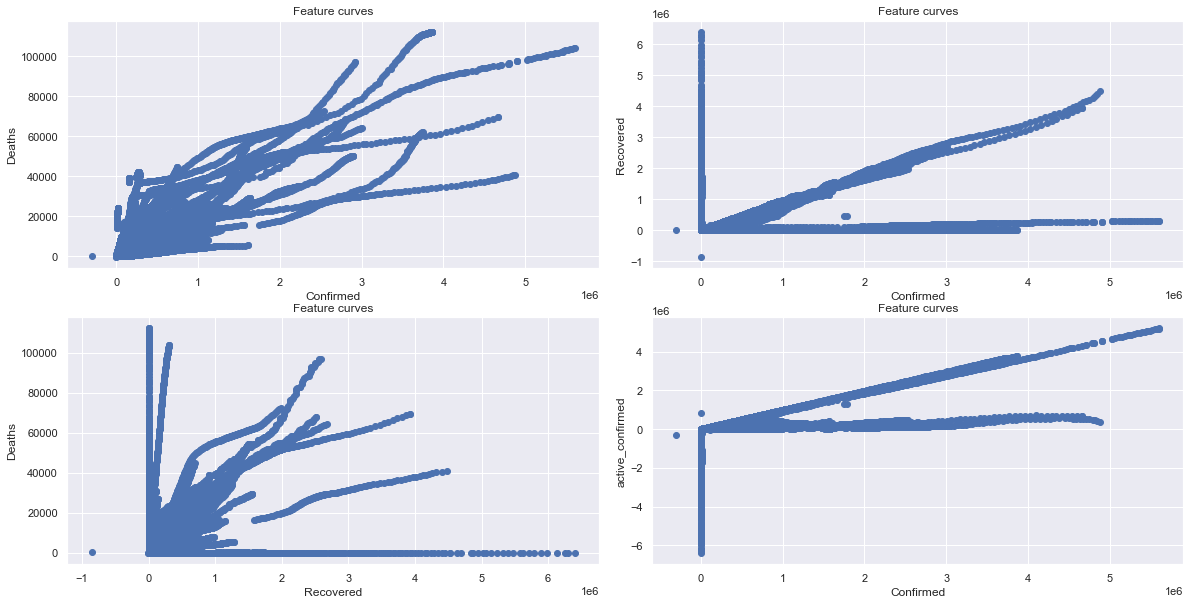

In [18]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    col = features[i-1]
    val = values[i-1]
    ax.scatter(val[0], val[1])
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title('Feature curves')
plt.show()

In [19]:
start_date = impute_covid.ObservationDate.min()
end_date = impute_covid.ObservationDate.max()
print('Covid-19 information:\n 1. Start date = {}\n 2. End date = {}'.format(start_date, end_date))

Covid-19 information:
 1. Start date = 2020-01-22 00:00:00
 2. End date = 2021-05-02 00:00:00


In [20]:
worldwide = impute_covid[impute_covid['ObservationDate'] == end_date]

In [21]:
countries = len(worldwide['Country/Region'].value_counts()) 
worldwide['Country/Region'].value_counts()

Russia         83
US             58
Japan          49
India          37
Colombia       34
               ..
Rwanda          1
Switzerland     1
Liberia         1
Montenegro      1
San Marino      1
Name: Country/Region, Length: 194, dtype: int64

In [22]:
world = worldwide.groupby('Country/Region').sum()
world = world.sort_values(by=['Confirmed'], ascending=False)
world.head()

,Confirmed,Deaths,Recovered,active_confirmed
Country/Region,,,,
US,32421534.0,577045.0,0.0,31844489.0
India,19557457.0,215542.0,15992271.0,3349644.0
Brazil,14754910.0,407639.0,13083550.0,1263721.0
France,5713393.0,104980.0,362043.0,5246370.0
Turkey,4875388.0,40844.0,4480381.0,354163.0


In [28]:
print('Worldwide')
print('To {}\n'.format(end_date))
print('Total confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n\
Total country Recorded: {} \n'.format(\
worldwide.Confirmed.sum(), worldwide.Deaths.sum(), worldwide.Recovered.sum(), worldwide.active_confirmed.sum(),\
                                     countries))

Worldwide
To 2021-05-02 00:00:00

Total confirmed: 152502340.0
Total Deaths: 3199106.0
Total Recovered: 89311961.0
Total active confirmed: 59991273.0
Total country Recorded: 194 



In [29]:
world_table = world.reset_index()

In [37]:
top_range = world_table.head(7)

In [38]:
top_range.style.background_gradient(cmap='viridis')

,Country/Region,Confirmed,Deaths,Recovered,active_confirmed
0,US,32421534.000000,577045.000000,0.000000,31844489.000000
1,India,19557457.000000,215542.000000,15992271.000000,3349644.000000
2,Brazil,14754910.000000,407639.000000,13083550.000000,1263721.000000
3,France,5713393.000000,104980.000000,362043.000000,5246370.000000
4,Turkey,4875388.000000,40844.000000,4480381.000000,354163.000000
5,Russia,4768476.000000,109011.000000,4393260.000000,266205.000000
6,UK,4435831.000000,127796.000000,14684.000000,4293351.000000


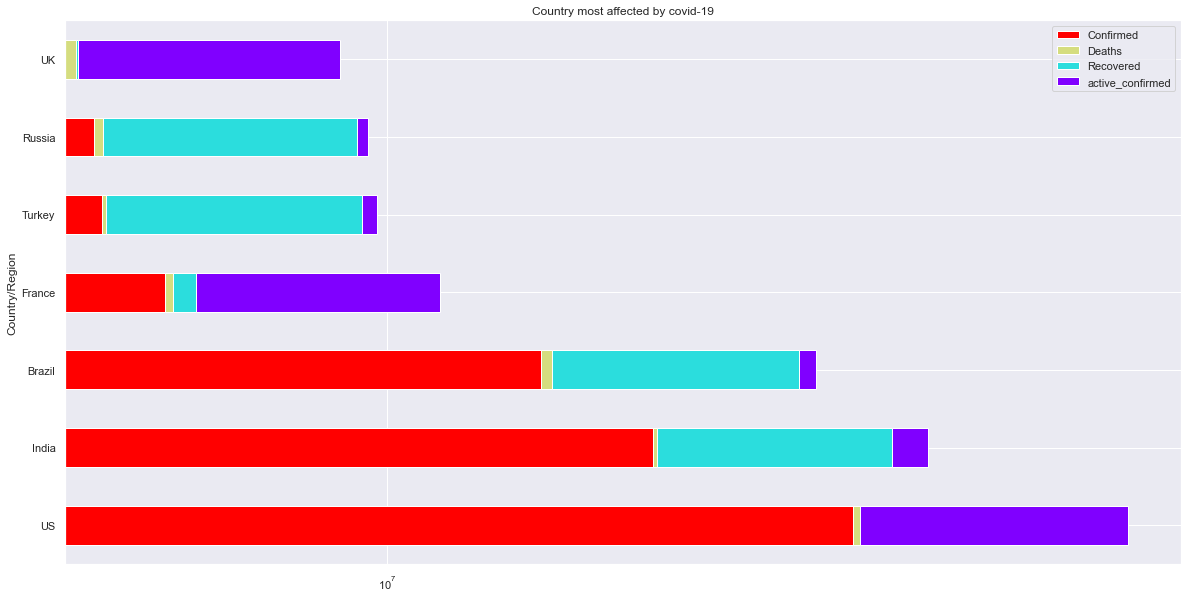

In [41]:
axs = top_range.plot('Country/Region', ['Confirmed', 'Deaths', 'Recovered', 'active_confirmed'], kind='barh',\
                 stacked=True, title='Country most affected by covid-19',\
                 figsize=(20,10),colormap='rainbow_r', logx=True, legend=True) 

## China

In [42]:
china = impute_covid[impute_covid['Country/Region'] == 'Mainland China']

In [43]:
china 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
285218,285219,2021-05-02,Tibet,Mainland China,2021-05-03 04:20:39,1.0,0.0,1.0,0.0
285246,285247,2021-05-02,Unknown,Mainland China,2021-05-03 04:20:39,0.0,0.0,9.0,-9.0
285290,285291,2021-05-02,Xinjiang,Mainland China,2021-05-03 04:20:39,980.0,3.0,977.0,0.0
285298,285299,2021-05-02,Yunnan,Mainland China,2021-05-03 04:20:39,344.0,2.0,291.0,51.0


In [44]:
china_star_date = china.ObservationDate.min()
china_end_date = china.ObservationDate.max()

In [46]:
print('Covid-19 China:\nstart date = {}\nend date = {}'.format(china_star_date, china_end_date))

Covid-19 China:
start date = 2020-01-22 00:00:00
end date = 2021-05-02 00:00:00


In [47]:
last_China = china[china['ObservationDate'] == china_end_date]
last_China.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
284736,284737,2021-05-02,Anhui,Mainland China,2021-05-03 04:20:39,994.0,6.0,988.0,0.0
284770,284771,2021-05-02,Beijing,Mainland China,2021-05-03 04:20:39,1057.0,9.0,1043.0,5.0
284820,284821,2021-05-02,Chongqing,Mainland China,2021-05-03 04:20:39,596.0,6.0,585.0,5.0
284862,284863,2021-05-02,Fujian,Mainland China,2021-05-03 04:20:39,593.0,1.0,566.0,26.0
284867,284868,2021-05-02,Gansu,Mainland China,2021-05-03 04:20:39,193.0,2.0,190.0,1.0


In [49]:
print('China')
print('To {} on COVID-19\n'.format(china_end_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
last_China.Confirmed.sum(), last_China.Deaths.sum(), last_China.Recovered.sum(), last_China.active_confirmed.sum()))

China
To 2021-05-02 00:00:00 on COVID-19

Tota confirmed: 90697.0
Total Deaths: 4636.0
Total Recovered: 85738.0
Total active confirmed: 323.0



In [51]:
last_China[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
284736,Anhui,994.000000,6.000000,988.000000,0.000000
284770,Beijing,1057.000000,9.000000,1043.000000,5.000000
284820,Chongqing,596.000000,6.000000,585.000000,5.000000
284862,Fujian,593.000000,1.000000,566.000000,26.000000
284867,Gansu,193.000000,2.000000,190.000000,1.000000
284885,Guangdong,2354.000000,8.000000,2291.000000,55.000000
284886,Guangxi,274.000000,2.000000,266.000000,6.000000
284889,Guizhou,147.000000,2.000000,145.000000,0.000000
284892,Hainan,188.000000,6.000000,165.000000,17.000000
284898,Hebei,1317.000000,7.000000,1310.000000,0.000000


## Provinces Confirmed, Recovered and Death

In [53]:
provinces = last_China.groupby('Province/State').sum()
provinces = provinces.sort_values(by=['Confirmed'], ascending=False)

Text(0, 0.5, 'Total patients')

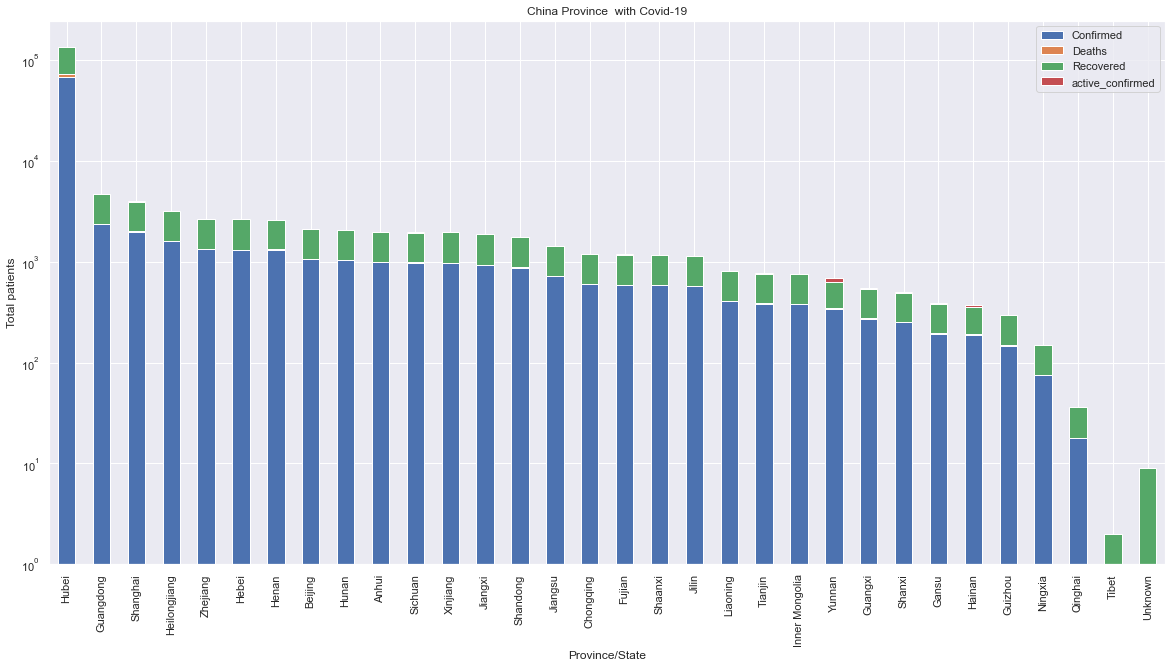

In [55]:
provinces.plot(kind='bar', label='Confirmed',logy=True,figsize=(20,10), stacked=True,\
              title='China Province  with Covid-19')
plt.ylabel('Total patients')

In [56]:
conf_china = china.groupby('ObservationDate')['Confirmed'].agg('sum')
rec_china = china.groupby('ObservationDate')['Recovered'].agg('sum')
dea_china = china.groupby('ObservationDate')['Deaths'].agg('sum')
ac_china = china.groupby('ObservationDate')['active_confirmed'].agg('sum')

In [57]:
print("China confimed", conf_china)
print("China Recovered", rec_china)
print("China Deaths", dea_china)
print("China Active Confirmed", ac_china)

China confimed ObservationDate
2020-01-22      547.0
2020-01-23     1082.0
2020-01-24      916.0
2020-01-25     1399.0
2020-01-26     2062.0
               ...   
2021-04-28    90642.0
2021-04-29    90655.0
2021-04-30    90671.0
2021-05-01    90686.0
2021-05-02    90697.0
Name: Confirmed, Length: 467, dtype: float64
China Recovered ObservationDate
2020-01-22       28.0
2020-01-23       58.0
2020-01-24       36.0
2020-01-25       39.0
2020-01-26       49.0
               ...   
2021-04-28    85682.0
2021-04-29    85691.0
2021-04-30    85710.0
2021-05-01    85725.0
2021-05-02    85738.0
Name: Recovered, Length: 467, dtype: float64
China Deaths ObservationDate
2020-01-22      17.0
2020-01-23      34.0
2020-01-24      26.0
2020-01-25      42.0
2020-01-26      56.0
               ...  
2021-04-28    4636.0
2021-04-29    4636.0
2021-04-30    4636.0
2021-05-01    4636.0
2021-05-02    4636.0
Name: Deaths, Length: 467, dtype: float64
China Active Confirmed ObservationDate
2020-01-22     502.0
2

## Beside China

In [58]:
rest_world = impute_covid[impute_covid['Country/Region'] != 'Mainland China']

In [59]:
rest_world.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
12,13,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,0.0
20,21,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
28,29,2020-01-22,Taiwan,Taiwan,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
31,32,2020-01-22,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
35,36,2020-01-22,missing_value,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,2.0


In [60]:
print('Covid-19 ROW:\nStart date = {}\nEnd date = {}'.format(rest_world.ObservationDate.min(),\
                    rest_world.ObservationDate.max()))

Covid-19 ROW:
Start date = 2020-01-22 00:00:00
End date = 2021-05-02 00:00:00


In [61]:
row = rest_world[rest_world['ObservationDate'] == rest_world.ObservationDate.max()]
row

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
284543,284544,2021-05-02,missing_value,Afghanistan,2021-05-03 04:20:39,60122.0,2637.0,53391.0,4094.0
284544,284545,2021-05-02,missing_value,Albania,2021-05-03 04:20:39,131238.0,2397.0,110920.0,17921.0
284545,284546,2021-05-02,missing_value,Algeria,2021-05-03 04:20:39,122522.0,3270.0,85398.0,33854.0
284546,284547,2021-05-02,missing_value,Andorra,2021-05-03 04:20:39,13282.0,127.0,12753.0,402.0
284547,284548,2021-05-02,missing_value,Angola,2021-05-03 04:20:39,26993.0,602.0,23913.0,2478.0
...,...,...,...,...,...,...,...,...,...
285301,285302,2021-05-02,Zakarpattia Oblast,Ukraine,2021-05-03 04:20:39,60151.0,1527.0,54174.0,4450.0
285302,285303,2021-05-02,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0,15912.0
285303,285304,2021-05-02,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0,25812.0
285305,285306,2021-05-02,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0,14515.0


In [64]:
rw = row[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].\
groupby('Country/Region').sum()
rows = rw.sort_values(by=['Confirmed'], ascending=False)
rows.style.background_gradient(cmap='viridis')

,Confirmed,Deaths,Recovered,active_confirmed
Country/Region,,,,
US,32421534.000000,577045.000000,0.000000,31844489.000000
India,19557457.000000,215542.000000,15992271.000000,3349644.000000
Brazil,14754910.000000,407639.000000,13083550.000000,1263721.000000
France,5713393.000000,104980.000000,362043.000000,5246370.000000
Turkey,4875388.000000,40844.000000,4480381.000000,354163.000000
Russia,4768476.000000,109011.000000,4393260.000000,266205.000000
UK,4435831.000000,127796.000000,14684.000000,4293351.000000
Italy,4044762.000000,121177.000000,3492679.000000,430906.000000
Spain,3524077.000000,78216.000000,150376.000000,3295485.000000


Text(0, 0.5, 'Total patients')

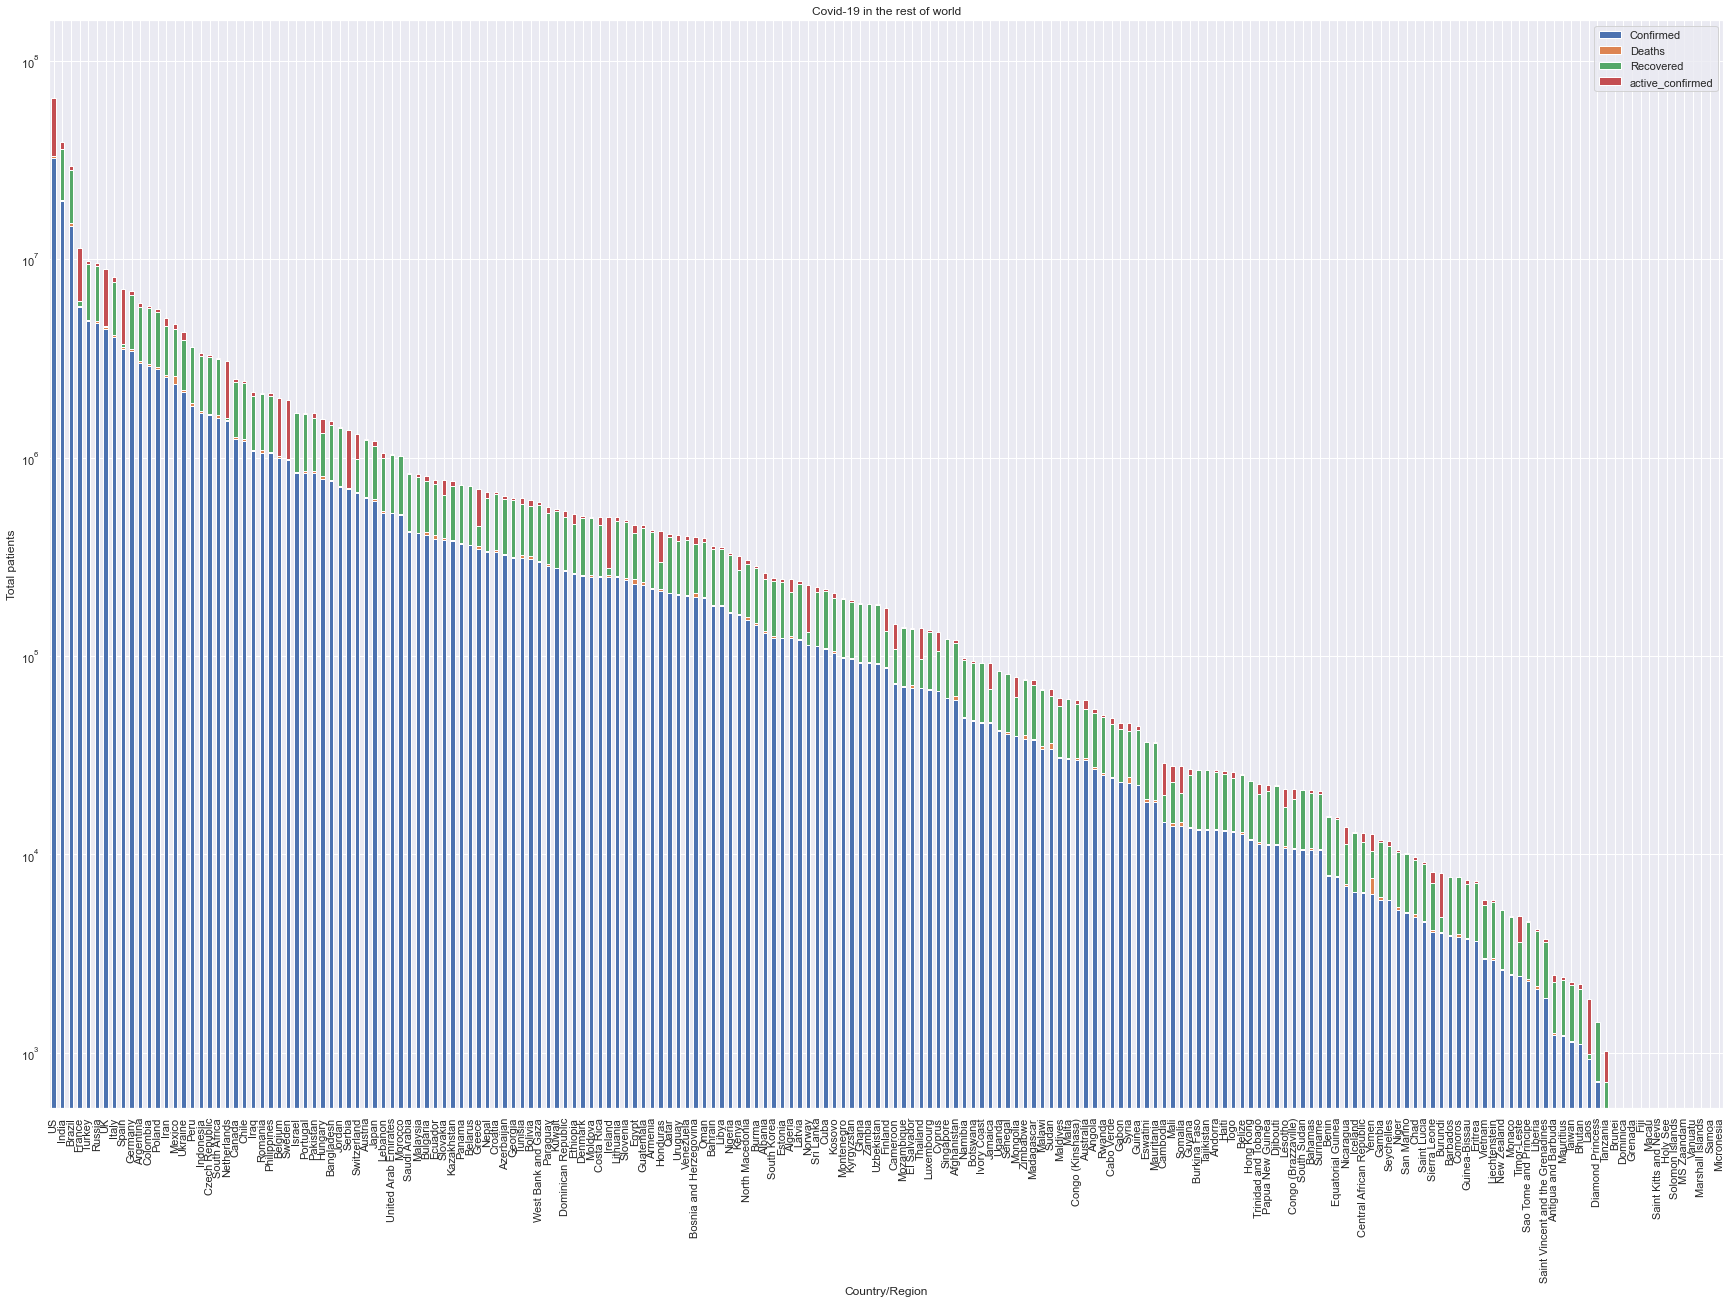

In [65]:
rows.plot(kind='bar', figsize=(30,20), stacked=True, title='Covid-19 in the rest of world', logy=True)
plt.ylabel('Total patients')

## Aggregate  Data

In [67]:
obs_conf_world = rest_world.groupby('ObservationDate')['Confirmed'].aggregate([np.sum]) 
ac_conf_world = rest_world.groupby('ObservationDate')['active_confirmed'].aggregate([np.sum])
patient_world_r = rest_world.groupby('ObservationDate')['Recovered'].aggregate([np.sum]) 
patient_world_dea = rest_world.groupby('ObservationDate')['Deaths'].aggregate([np.sum]) 

In [68]:
obs_conf_world 

,sum
ObservationDate,
2020-01-22,10.0
2020-01-23,15.0
2020-01-24,25.0
2020-01-25,38.0
2020-01-26,56.0
...,...
2021-04-28,149532222.0
2021-04-29,150429811.0
2021-04-30,151308809.0


In [69]:
ac_conf_world 

,sum
ObservationDate,
2020-01-22,8.0
2020-01-23,13.0
2020-01-24,22.0
2020-01-25,35.0
2020-01-26,49.0
...,...
2021-04-28,59628826.0
2021-04-29,59804118.0
2021-04-30,59981966.0


In [70]:
patient_world_r

,sum
ObservationDate,
2020-01-22,2.0
2020-01-23,2.0
2020-01-24,3.0
2020-01-25,3.0
2020-01-26,7.0
...,...
2021-04-28,86757357.0
2021-04-29,87464664.0
2021-04-30,88151241.0


In [71]:
patient_world_dea

,sum
ObservationDate,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-04-28,3146039.0
2021-04-29,3161029.0
2021-04-30,3175602.0


In [72]:
obs_conf_world.columns = ['Confirmed']
ac_conf_world.columns = ['active_confirmed']
patient_world_r.columns = ['Recovered'] 
patient_world_dea.columns = ['Deaths'] 

In [74]:
obs_conf_world

,Confirmed
ObservationDate,
2020-01-22,10.0
2020-01-23,15.0
2020-01-24,25.0
2020-01-25,38.0
2020-01-26,56.0
...,...
2021-04-28,149532222.0
2021-04-29,150429811.0
2021-04-30,151308809.0


# Builde Model

In [75]:
from sklearn.preprocessing import MinMaxScaler
import datetime
from keras.layers.recurrent import GRU
from keras.layers import Dense, Input, Dropout 
from keras.models import Model 
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint

In [76]:
confirmed_cases = impute_covid[['ObservationDate', 'Confirmed']]
confirmed_cases = confirmed_cases.set_index('ObservationDate')

In [78]:
confirmed_cases

,Confirmed
ObservationDate,
2020-01-22,1.0
2020-01-22,14.0
2020-01-22,6.0
2020-01-22,1.0
2020-01-22,0.0
...,...
2021-05-02,96531.0
2021-05-02,26045.0
2021-05-02,1344.0


## Scaler the Confiremed cases

In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
confirmed_cases['scaled_cases']= scaler.fit_transform(np.array(confirmed_cases.Confirmed).reshape(-1,1))

In [80]:
confirmed_cases

,Confirmed,scaled_cases
ObservationDate,,
2020-01-22,1.0,0.051257
2020-01-22,14.0,0.051259
2020-01-22,6.0,0.051258
2020-01-22,1.0,0.051257
2020-01-22,0.0,0.051257
...,...,...
2021-05-02,96531.0,0.067595
2021-05-02,26045.0,0.055665
2021-05-02,1344.0,0.051484


In [81]:
confirmed_cases.head()

,Confirmed,scaled_cases
ObservationDate,,
2020-01-22,1.0,0.051257
2020-01-22,14.0,0.051259
2020-01-22,6.0,0.051258
2020-01-22,1.0,0.051257
2020-01-22,0.0,0.051257


In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

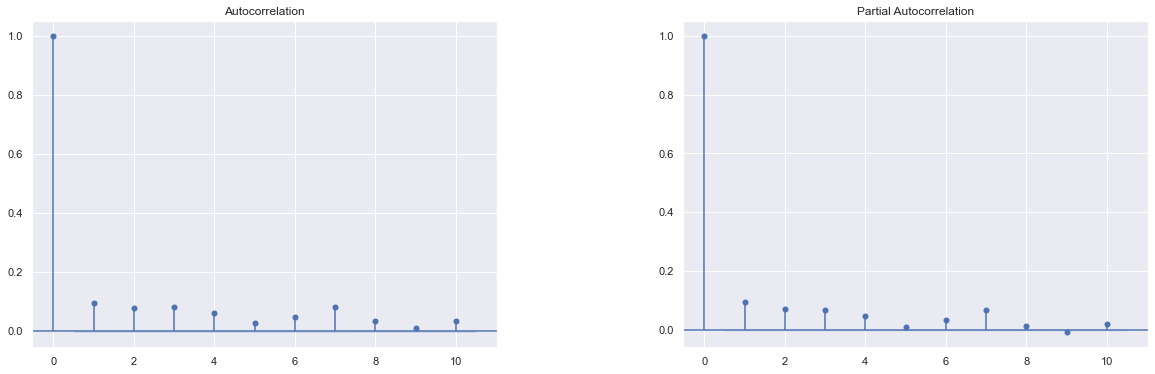

In [83]:
fig = plt.figure(figsize=(20, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1  = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_acf(confirmed_cases.scaled_cases, ax=ax1, lags=10)
plot_pacf(confirmed_cases.scaled_cases, ax=ax2, lags=10)
plt.show()

# Split the last 3 days as test dataset

In [84]:
test_days = 3

In [85]:
split_date = end_date - datetime.timedelta(days=test_days) + datetime.timedelta(hours=23, minutes=59,seconds=59)

In [86]:
split_date

Timestamp('2021-04-29 23:59:59')

In [87]:
train = confirmed_cases[confirmed_cases.index <= split_date]
test = confirmed_cases[confirmed_cases.index > split_date]

In [88]:
train.shape

(283015, 2)

In [89]:
test.shape

(2292, 2)

In [90]:
train

,Confirmed,scaled_cases
ObservationDate,,
2020-01-22,1.0,0.051257
2020-01-22,14.0,0.051259
2020-01-22,6.0,0.051258
2020-01-22,1.0,0.051257
2020-01-22,0.0,0.051257
...,...,...
2021-04-29,95406.0,0.067404
2021-04-29,25634.0,0.055595
2021-04-29,1343.0,0.051484


In [91]:
test

,Confirmed,scaled_cases
ObservationDate,,
2021-04-30,59745.0,0.061369
2021-04-30,131085.0,0.073443
2021-04-30,122108.0,0.071924
2021-04-30,13232.0,0.053496
2021-04-30,26652.0,0.055768
...,...,...
2021-05-02,96531.0,0.067595
2021-05-02,26045.0,0.055665
2021-05-02,1344.0,0.051484


In [92]:
def make_feature_label(df, days_lookback): 
    X = [] 
    y = [] 
    for i in range(nb_timesteps, df.shape[0]): 
        
        X.append(list(df.iloc[i-nb_timesteps:i])) 
        y.append(df.iloc[i]) 
    X, y = np.array(X), np.array(y) 
    return X, y 

In [94]:
X_train, y_train = make_feature_label(train['scaled_cases'], test_days - 1) 

In [95]:
X_train

array([[0.05125689, 0.05125909],
       [0.05125909, 0.05125774],
       [0.05125774, 0.05125689],
       ...,
       [0.06740431, 0.05559531],
       [0.05559531, 0.05148403],
       [0.05148403, 0.06546215]])

In [96]:
y_train

array([0.05125774, 0.05125689, 0.05125672, ..., 0.05148403, 0.06546215,
       0.11129471])

In [97]:
X_train.shape

(283013, 2)

In [98]:
y_train

array([0.05125774, 0.05125689, 0.05125672, ..., 0.05148403, 0.06546215,
       0.11129471])

In [99]:
X_test, y_test = make_feature_label(test['scaled_cases'], test_days - 1) 

In [100]:
X_test

array([[0.06136864, 0.07344302],
       [0.07344302, 0.07192366],
       [0.07192366, 0.05349626],
       ...,
       [0.06759472, 0.05566487],
       [0.05566487, 0.0514842 ],
       [0.0514842 , 0.06558232]])

In [101]:
X_test.shape

(2290, 2)

In [102]:
y_test

array([0.07192366, 0.05349626, 0.05576761, ..., 0.0514842 , 0.06558232,
       0.11207327])

In [103]:
y_test.shape

(2290,)

In [104]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) 

In [105]:
x_train

array([[[0.05125689],
        [0.05125909]],

       [[0.05125909],
        [0.05125774]],

       [[0.05125774],
        [0.05125689]],

       ...,

       [[0.06740431],
        [0.05559531]],

       [[0.05559531],
        [0.05148403]],

       [[0.05148403],
        [0.06546215]]])

In [106]:
x_train.shape

(283013, 2, 1)

In [107]:
x_test

array([[[0.06136864],
        [0.07344302]],

       [[0.07344302],
        [0.07192366]],

       [[0.07192366],
        [0.05349626]],

       ...,

       [[0.06759472],
        [0.05566487]],

       [[0.05566487],
        [0.0514842 ]],

       [[0.0514842 ],
        [0.06558232]]])

In [108]:
x_test.shape

(2290, 2, 1)

In [109]:
n =  x_train.shape[1]

In [110]:
np.random.seed(7)

In [111]:
input_layer = Input(shape=(n,1), dtype='float32')

In [112]:
gru_layer1 = GRU(64, input_shape=(n,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(n,64), return_sequences=False)(gru_layer1)

In [113]:
dropout_layer = Dropout(0.2)(gru_layer2)

In [114]:
output_layer = Dense(1, activation='linear')(dropout_layer)

In [115]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 2, 64)             12864     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


In [116]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20,verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
8845/8845 [==============================] - 39s 4ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 2/20
8845/8845 [==============================] - 35s 4ms/step - loss: 0.0016 - val_loss: 0.0075
Epoch 3/20
8845/8845 [==============================] - 36s 4ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 4/20
8845/8845 [==============================] - 34s 4ms/step - loss: 0.0017 - val_loss: 0.0076
Epoch 5/20
8845/8845 [==============================] - 40s 4ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 6/20
8845/8845 [==============================] - 36s 4ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 7/20
8845/8845 [==============================] - 35s 4ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 8/20
8845/8845 [==============================] - 35s 4ms/step - loss: 0.0016 - val_loss: 0.0073
Epoch 9/20
8845/8845 [==============================] - 35s 4ms/step - loss: 0.0016 - val_loss: 0.0076
Epoch 10/20
8845/8845 [==============================] - 36s 4ms/step - l

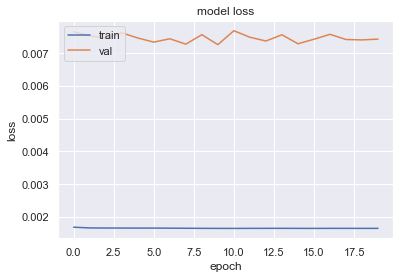

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [127]:
preds = model.predict(x_test)
pred_covid19 = scaler.inverse_transform(preds)
pred_covid19 = np.squeeze(pred_covid19)

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
rmse = np.sqrt(mean_squared_error(test.Confirmed.iloc[n:] , pred_covid19))
print('RMSE for the test set:', round(rmse, 4))

RMSE for the test set: 509373.3115


In [130]:
actual_pred = pd.DataFrame()
actual_pred['actual'] = test.Confirmed.iloc[n:]
actual_pred['predict'] =  pred_covid19

In [131]:
valid = actual_pred.reset_index()

In [132]:
valid

,index,actual,predict
0,2021-04-30,122108.0,117198.109375
1,2021-04-30,13232.0,115374.289062
2,2021-04-30,26652.0,75199.148438
3,2021-04-30,1232.0,50101.179688
4,2021-04-30,2977363.0,34708.308594
...,...,...,...
2285,2021-05-02,96531.0,82743.000000
2286,2021-05-02,26045.0,105589.820312
2287,2021-05-02,1344.0,78347.343750
2288,2021-05-02,84641.0,34394.265625


Text(0.5, 0, 'ObservationDate')

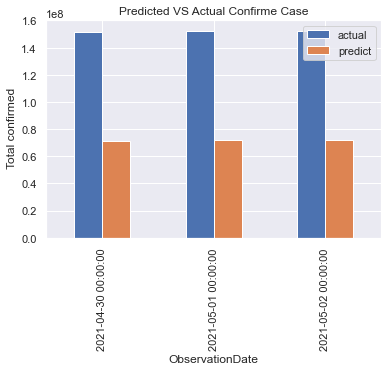

In [133]:
valid.groupby('index').sum().plot(kind='bar')
plt.ylabel(' Total confirmed')
plt.title('Predicted VS Actual Confirme Case')
plt.xlabel('ObservationDate')

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV


# activation = ["elu", "exponential", "hard_sigmoid", "linear", "relu", "selu", "sigmoid", "softmax", "softplus", "softsign"]

# optimizer = ["Adadelta", "Adagrad", "Adam", "Adamax", "Ftrl", "Nadam", "ORMSprop", "SGD"]

# metrics =['accuracy', 'rmsprop']

# units = [32, 64, 128]

# # prepare grid search (search space)
# search_space = [{'activation': activation,
#                  'oprimizers': optimizer,
#                 'units': units}]  # grid 1 for linear regression

# pipeline= Pipeline( ("input layer" ,Input(shape=(n,1), dtype='float32')),
#                     ("GRU", GRU(units=units, input_shape=(n,1), return_sequences=True, activation=activation)(input_layer)),
#                     ("GRU", GRU(units=units, input_shape=(n,1), return_sequences=False, activation=activation)(input_layer)),
#                     ("dropout_layer" ,Dropout(0.2)(gru_layer) ),
#                     ("output_layer", Dense(1, activation=activation)(dropout_layer)),
#                     ("ts_model", Model(inputs=input_layer, outputs=output_layer)),
#                     ("comp", ts_model.compile(loss='mae', optimizer=optimizer,  metrics=metrics)))


In [ ]:
# set up grid search
# model_grid_cv = GridSearchCV(estimator=pipeline, 
#                    param_grid=search_space, 
#                    scoring='r2',
#                    cv=time_split)


In [136]:
def build_model(units1, units2, activation,optimizer):
    input_layer = Input(shape=(n,1), dtype='float32')
    gru_layer1 = GRU(units1, input_shape=(n,1), return_sequences=True)(input_layer)
    gru_layer2 = GRU(units2, input_shape=(n,64), return_sequences=False)(gru_layer1)
    dropout_layer = Dropout(0.2)(gru_layer2)
    output_layer = Dense(1, activation=activation)(dropout_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.summary()

## Not Work model

In [131]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer,Embedding,SpatialDropout1D
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.models import Sequential

In [132]:
activation="sigmoid"
loss="binary_crossentropy"
metrics=['accuracy']
optimizer='adam'
epochs=20

TFmodel= Sequential()
TFmodel.add(Embedding(30000, 64, input_length=1))
TFmodel.add(SpatialDropout1D(0.2))
TFmodel.add(Dense(1, activation=activation))
TFmodel.compile(loss=loss, metrics=metrics, optimizer=optimizer)

In [133]:
tensorboard = TensorBoard(log_dir='logs')
earlystopping = EarlyStopping(mode='min', patience=3, restore_best_weights=True)
history = TFmodel.fit(x_train,y_train,epochs=epochs, batch_size=64, callbacks=[tensorboard,earlystopping], validation_data=(x_test, y_test),)



Epoch 1/20
4423/4423 [==============================] - 48s 11ms/step - loss: 0.2681 - accuracy: 1.7965e-06 - val_loss: 0.2945 - val_accuracy: 0.0000e+00
Epoch 2/20
4423/4423 [==============================] - 49s 11ms/step - loss: 0.2390 - accuracy: 3.9904e-06 - val_loss: 0.2945 - val_accuracy: 0.0000e+00
Epoch 3/20
4423/4423 [==============================] - 49s 11ms/step - loss: 0.2388 - accuracy: 2.6345e-06 - val_loss: 0.2939 - val_accuracy: 0.0000e+00
Epoch 4/20
4423/4423 [==============================] - 54s 12ms/step - loss: 0.2384 - accuracy: 7.9121e-07 - val_loss: 0.2951 - val_accuracy: 0.0000e+00
Epoch 5/20
4423/4423 [==============================] - 51s 11ms/step - loss: 0.2382 - accuracy: 3.8683e-07 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 6/20
4423/4423 [==============================] - 51s 12ms/step - loss: 0.2379 - accuracy: 9.4638e-06 - val_loss: 0.2930 - val_accuracy: 0.0000e+00
Epoch 7/20
4423/4423 [==============================] - 50s 11ms/step - loss

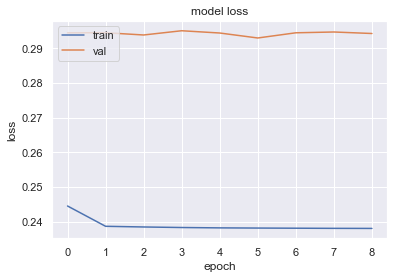

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

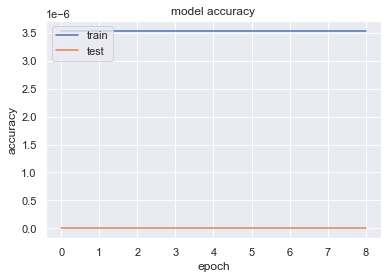

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()